In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [90]:
np.random.seed(42)

n = 1000

df = {
    'Gender': np.random.choice(['Male', 'Female'], size = n, p = [0.6, 0.4]),
    'Credit_Score': np.random.randint(300, 850, size = n),
    'Age': np.random.randint(18, 70, size = n),
    'Income': np.random.randint(20000, 150000, size = n),
    'Loan_Amount': np.random.randint(2500, 100000, size = n),
    'Loan_Accepted': np.random.choice(['No', 'Yes'], size = n, p = [0.8, 0.2])
}
df = pd.DataFrame(df)
df

,Gender,Credit_Score,Age,Income,Loan_Amount,Loan_Accepted
0,Male,311,47,100807,67119,No
1,Female,617,35,91312,64342,No
2,Female,515,36,79766,97303,No
3,Male,638,48,32449,29490,No
4,Male,380,36,109833,18693,No
...,...,...,...,...,...,...
995,Male,635,62,87054,51347,No
996,Female,354,36,50949,50503,Yes
997,Male,799,55,42547,22889,No
998,Female,835,33,101882,47023,No


In [91]:
#Convert categorical variables to numerical
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Loan_Accepted'] = df['Loan_Accepted'].map({'No': 0, 'Yes': 1})
X = df[['Gender', 'Credit_Score', 'Age', 'Income', 'Loan_Amount']]
y = df['Loan_Accepted']


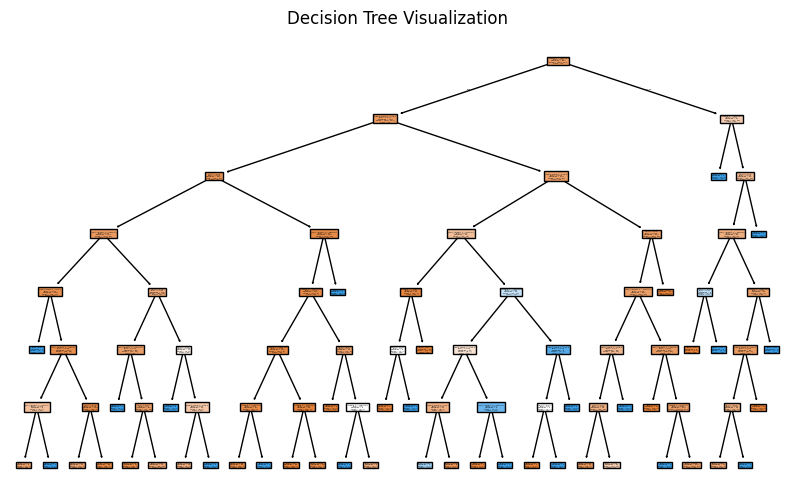

Accuracy: 0.73


In [92]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

print(f"Accuracy: {accuracy}")

Trust Game Part 6:

In [ ]:
def calculate_disparate_impact(y_true, y_pred, sensitive_feature):
    group_0 = sensitive_feature == 0
    group_1 = sensitive_feature == 1

    pos_rate_group_0 = np.mean(y_pred[group_0] == 1)
    pos_rate_group_1 = np.mean(y_pred[group_1] == 1)

    return pos_rate_group_0 / pos_rate_group_1

def calculate_equalized_odds(y_true, y_pred, sensitive_feature):
    group_0 = sensitive_feature == 1
    group_1 = sensitive_feature == 0
    cm_group_0 = confusion_matrix(y_true[group_0], y_pred[group_0])
    cm_group_1 = confusion_matrix(y_true[group_1], y_pred[group_1])

    tp_0 = cm_group_0[0, 0]  
    fn_0 = cm_group_0[0, 1]  
    tp_1 = cm_group_1[0, 0]  
    fn_1 = cm_group_1[0, 1]  

    tp_rate_0 = tp_0 / (tp_0 + fn_0)
    fn_rate_0 = fn_0 / (tp_0 + fn_0)
    tp_rate_1 = tp_1 / (tp_1 + fn_1)
    fn_rate_1 = fn_1 / (tp_1 + fn_1)

    return abs(tp_rate_0 - tp_rate_1) + abs(fn_rate_0 - fn_rate_1)

def conf_mat(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))

# Using Gender as the sensitive feature (1=Female, 0=Male)
sensitive_feature = X_test['Gender']

# Calculate fairness metrics
disparate_impact = calculate_disparate_impact(y_test, y_pred, sensitive_feature)
equalized_odds = calculate_equalized_odds(y_test, y_pred, sensitive_feature)

# Display results
print(f"Disparate Impact (Female/Male): {disparate_impact:.2f}")
print(f"Equalized Odds Difference: {equalized_odds:.2f}")

Disparate Impact (Female/Male): 0.25
Equalized Odds Difference: 0.11
